In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("white")

In [2]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
data["survived"] = pd.Categorical(data["survived"])
data["pclass"] = pd.Categorical(data["pclass"])
data["sex"] = pd.Categorical(data["sex"])

### Tablas de frecuencia y diagramas de barras

col_0     pasajeros
survived           
0               549
1               342


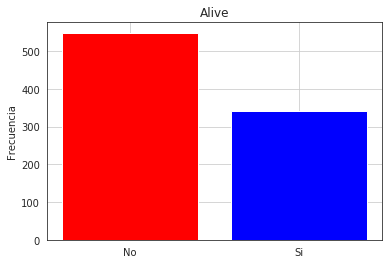

In [5]:
#tabla
tab = pd.crosstab(data['survived'], columns = "pasajeros")
print(tab)

#diagrama de barras

plt.bar([1,2], tab["pasajeros"], color = ["red","blue"])
plt.xticks([1,2], ("No","Si"))
plt.ylabel("Frecuencia")
plt.title("Alive")
plt.grid()
plt.show()

In [6]:
tab2 = pd.crosstab(index = data["pclass"], columns="pasajeros")
tab2

col_0,pasajeros
pclass,
1,216
2,184
3,491


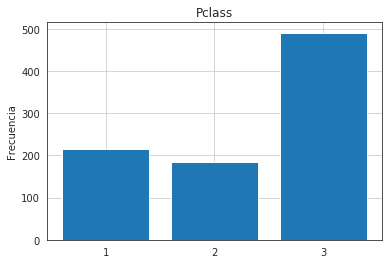

In [7]:
plt.bar([1,2,3], tab2["pasajeros"])
plt.xticks([1,2,3], ("1","2","3"))
plt.ylabel("Frecuencia")
plt.title("Pclass")
plt.grid()
plt.show()

In [8]:
pd.crosstab(index = data["sex"], columns = "pasajeros")

col_0,pasajeros
sex,
female,314
male,577


In [9]:
# cubiertas en las que se alojaban los pasajeros

tab_c = pd.crosstab(index = data["deck"], columns = "count")

tab_c

col_0,count
deck,
A,15
B,47
C,59
D,33
E,32
F,13
G,4


In [10]:
tab_c.sum() # solo se conocen 

col_0
count    203
dtype: int64

In [11]:
#Frecuencia relativa

round(tab_c/tab_c.sum(),2)

col_0,count
deck,
A,0.07
B,0.23
C,0.29
D,0.16
E,0.16
F,0.06
G,0.02


### Tablas de dos variables

In [12]:
survived_sex =  pd.crosstab(index = data["survived"], columns = data["sex"])
survived_sex.index = ["died","survived"]
survived_sex

sex,female,male
died,81,468
survived,233,109


In [15]:
survived_class = pd.crosstab(index = data["survived"], columns=data["pclass"],margins=True)
survived_class.index = ["murio","sobrevivio", "total_clase"]
survived_class.columns = ["primera","segunda","tercera","total_superv"]
survived_class

,primera,segunda,tercera,total_superv
murio,80,97,372,549
sobrevivio,136,87,119,342
total_clase,216,184,491,891


### Frecuencias relativas globales

In [22]:
survived_class/survived_class.loc["total_clase","total_superv"]

,primera,segunda,tercera,total_superv
murio,0.089787,0.108866,0.417508,0.616162
sobrevivio,0.152637,0.097643,0.133558,0.383838
total_clase,0.242424,0.206510,0.551066,1.000000


### Frecuencias relativas marginales

In [23]:
survived_class/survived_class.loc["total_clase"]

,primera,segunda,tercera,total_superv
murio,0.37037,0.527174,0.757637,0.616162
sobrevivio,0.62963,0.472826,0.242363,0.383838
total_clase,1.00000,1.000000,1.000000,1.000000


In [25]:
survived_class.T/survived_class["total_superv"]

,murio,sobrevivio,total_clase
primera,0.145719,0.397661,0.242424
segunda,0.176685,0.254386,0.206510
tercera,0.677596,0.347953,0.551066
total_superv,1.000000,1.000000,1.000000


In [26]:
# si no queremos trasponer y conservar la estructura

survived_class.div(survived_class["total_superv"], axis = 0)

,primera,segunda,tercera,total_superv
murio,0.145719,0.176685,0.677596,1.0
sobrevivio,0.397661,0.254386,0.347953,1.0
total_clase,0.242424,0.206510,0.551066,1.0


### Tablas multidimensionales

In [32]:
surv_sex_class = pd.crosstab(index = data["survived"],
                            columns = [data["sex"],data["pclass"]],
                             margins= True)
surv_sex_class

sex      female          male            All
pclass        1   2    3    1    2    3     
survived                                    
0             3   6   72   77   91  300  549
1            91  70   72   45   17   47  342
All          94  76  144  122  108  347  891

In [33]:
surv_sex_class["female"]

pclass,1,2,3
survived,,,
0,3,6,72
1,91,70,72
All,94,76,144


In [34]:
surv_sex_class["female"][1]

survived
0       3
1      91
All    94
Name: 1, dtype: int64

In [35]:
surv_sex_class/surv_sex_class.loc["All"]

sex         female                     male                           All
pclass           1         2    3         1         2         3          
survived                                                                 
0         0.031915  0.078947  0.5  0.631148  0.842593  0.864553  0.616162
1         0.968085  0.921053  0.5  0.368852  0.157407  0.135447  0.383838
All       1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000